## Биометрия и нейротехнологии. Лабораторная работа № 6.

<div style="text-align: right"> 
    Чангалиди Антон, P3214
</div>

## Part1. Image recognition

Туториал [тут](https://medium.com/@guymodscientist/image-prediction-with-10-lines-of-code-3266f4039c7a).

Модель [тут](https://github.com/fchollet/deep-learning-models/releases/download/v0.2/resnet50_weights_tf_dim_ordering_tf_kernels.h5)

### 0. Установить все библиотеки 
(conda или pip в помощь)

### 1. Download the ResNet Model file which was trained on the ImageNet-1000 dataset and copy the file to your python project folder.

Ну собственно тоже не сложный шаг, модель лежит в директории в файле `resnet50_weights_tf_dim_ordering_tf_kernels.h5`.

### 2. Ну теперь посмотрим, что да как:

In [1]:
# гружу библиотеки
from imageai.Prediction import ImagePrediction
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# подгружаю модель-предиктор
execution_path = os.getcwd()
prediction = ImagePrediction()
prediction.setModelTypeAsResNet()
prediction.setModelPath( execution_path + "/models/resnet50_weights_tf_dim_ordering_tf_kernels.h5")
prediction.loadModel()

/home/toharhymes/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/toharhymes/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/toharhymes/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/toharhymes/anaconda3/lib/python3.7/site-packages/tensorflow/pyth

Instructions for updating:
Colocations handled automatically by placer.


Машина


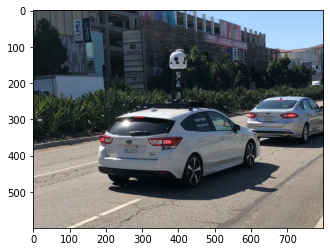

cab  :  9.916086494922638
convertible  :  5.91195710003376
car_wheel  :  5.106287449598312
parking_meter  :  4.874100536108017
minivan  :  4.600734263658524

Машина


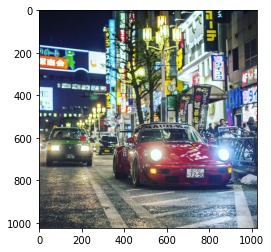

cab  :  95.2544093132019
fire_engine  :  1.2322287075221539
streetcar  :  0.8887124247848988
limousine  :  0.6745433434844017
traffic_light  :  0.4729919135570526

Кошка


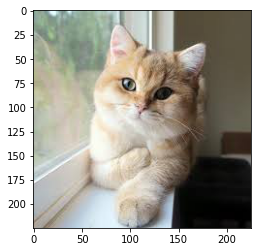

Egyptian_cat  :  26.277896761894226
window_screen  :  18.21310669183731
tabby  :  11.24257743358612
lynx  :  8.651237189769745
Persian_cat  :  8.619095385074615

Собака


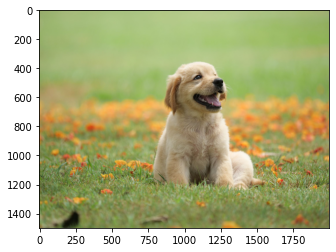

standard_poodle  :  96.96853160858154
miniature_poodle  :  2.383025549352169
soft-coated_wheaten_terrier  :  0.1773289404809475
Bedlington_terrier  :  0.12569937389343977
toy_poodle  :  0.0989031745120883

Тихоходочка


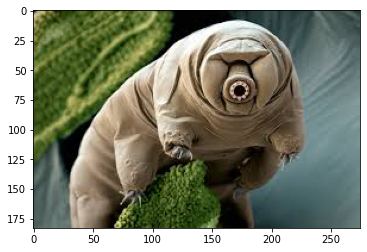

head_cabbage  :  14.263960719108582
African_chameleon  :  10.80339252948761
jackfruit  :  8.577468246221542
broccoli  :  8.410999178886414
stole  :  4.31167259812355

Тихоходочка


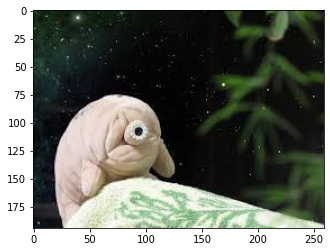

flamingo  :  40.320613980293274
orangutan  :  16.199161112308502
spoonbill  :  3.3734094351530075
eel  :  2.8004109859466553
snail  :  2.2714177146553993

Я на презентации проектов в ИБ:)


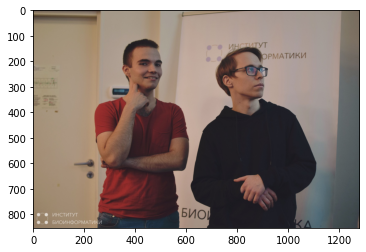

cardigan  :  10.339858382940292
jean  :  8.775600045919418
hand_blower  :  6.190439686179161
stole  :  5.332527309656143
sunglasses  :  5.25958351790905



In [2]:
# тестинг на изображениях
images = ["/data/car1.jpg", "/data/car2.jpg", "/data/cat1.jpg", "/data/dog1.jpg", "/data/tardigrade1.jpg", "/data/tardigrade2.jpg", "/data/me.jpg"]
names = ['Машина', 'Машина', 'Кошка', 'Собака', 'Тихоходочка', 'Тихоходочка', 'Я на презентации проектов в ИБ:)']
for img, name in zip(images, names):
    print(name)
    path_to_img = execution_path + img
    img_to_draw = mpimg.imread(path_to_img)
    imgplot = plt.imshow(img_to_draw)
    plt.show()
    predictions, percentage_probabilities = prediction.predictImage(path_to_img, result_count=5)
    for index in range(len(predictions)):
        print(predictions[index] , " : " , percentage_probabilities[index])
    print()

### Выводы:
* Машины библиотека идентифицирует хорошо (даже колеса, полосы для парковки и тд)
* Кошек и собак он даже пытается идентифицировать вплоть до породы - я меньше в них разбираюсь
* Тихоходочек не идентифицировал (видимо, при обучении модели их просто не было)
* Меня и Мишу в Институте биоинформатики он тоже не идентифицировал(((( Зато, нашу одежду - запросто. Скорее всего, тоже не обучалась эта модель на людях

## Part2. Object Detection

Туториал [тут](https://towardsdatascience.com/object-detection-with-10-lines-of-code-d6cb4d86f606).

Модель [тут](https://github.com/OlafenwaMoses/ImageAI/releases/download/1.0/resnet50_coco_best_v2.0.1.h5).

### 2.1 Подгружаем модель

In [3]:
from imageai.Detection import ObjectDetection
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

execution_path = os.getcwd()

# print(os.path.join(execution_path , "models/resnet50_coco_best_v2.0.1.h5"))

detector = ObjectDetection()
detector.setModelTypeAsRetinaNet()
detector.setModelPath( execution_path + "/models/resnet50_coco_best_v2.0.1.h5")
detector.loadModel()


Using TensorFlow backend.


tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_1:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_2:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_3:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_4:0' shape=(9, 4) dtype=float32> anchors


### 2.2 Тестим модель

In [4]:
images = ["/data/car1.jpg", "/data/car2.jpg", "/data/cat1.jpg", "/data/dog1.jpg", "/data/tardigrade1.jpg", "/data/tardigrade2.jpg", "/data/me.jpg"]
new_images = ["/output/car1.jpg", "/output/car2.jpg", "/output/cat1.jpg", "/output/dog1.jpg", "/output/tardigrade1.jpg", "/output/tardigrade2.jpg", "/output/me.jpg"]
names = ['Машина', 'Машина', 'Кошка', 'Собака', 'Тихоходочка', 'Тихоходочка', 'Я на презентации проектов в ИБ:)']


def draw(path_to_img):
    img_to_draw = mpimg.imread(path_to_img)
    imgplot = plt.imshow(img_to_draw)
    plt.show()
    
def detect_and_draw(name, to_draw_input, to_draw_output):
    print(name)
    detections = detector.detectObjectsFromImage(input_image=to_draw_input, output_image_path=to_draw_output)
    for eachObject in detections:
        print(eachObject["name"] , " : " , eachObject["percentage_probability"] )
    draw(to_draw_output)


Машина
car  :  99.55471754074097
car  :  97.53139019012451


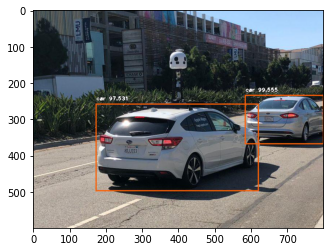

Машина
person  :  50.906902551651
car  :  73.05315136909485
car  :  98.33400249481201
car  :  97.82012701034546


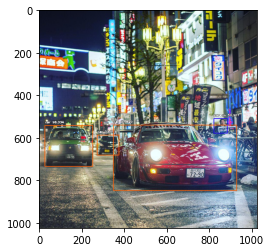

Кошка
cat  :  99.12844896316528


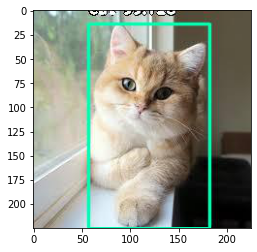

Собака
dog  :  99.95880722999573


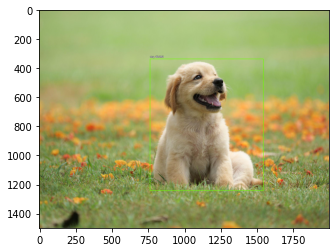

Тихоходочка
broccoli  :  90.11884927749634
person  :  70.0437068939209


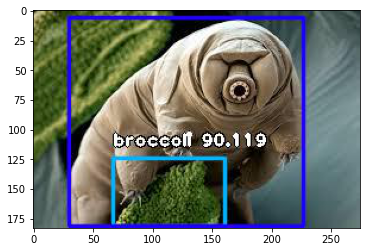

Тихоходочка
teddy bear  :  88.18683624267578


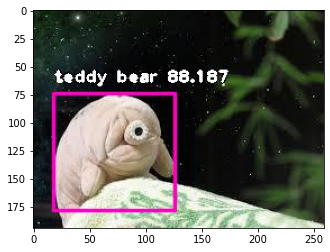

Я на презентации проектов в ИБ:)
person  :  98.67645502090454
person  :  56.68556094169617
person  :  99.95038509368896


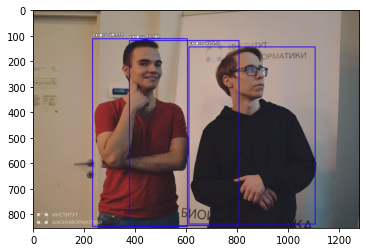

In [5]:
for img, new_img, name  in zip(images, new_images, names):
    to_draw_input = execution_path + img
    to_draw_output = execution_path + new_img
#     draw(to_draw_input)
    detect_and_draw(name, to_draw_input, to_draw_output)
    

### Выводы
* Пришлось установить Tensor flow версии 1.X, так как с v2.X ImageAI не работает:
``` 
pip install tensorflow==1.13.1
```
* Тут все достаточно хорошо распозналось (кроме тех же тихоходочек), особо нечего говорить, только на фотке со мной распозналось 3 человека, вместо 2х.

### Одинаковые объекты на разном расстоянии.
Для этого эксперимента я взял несколько фотографий машин и людей с разных расстояний, ракурсов, в разном количестве.

CARS
--------------
car  :  88.06415796279907
car  :  81.70562982559204
car  :  85.83391904830933
truck  :  93.04651618003845
truck  :  93.41883659362793


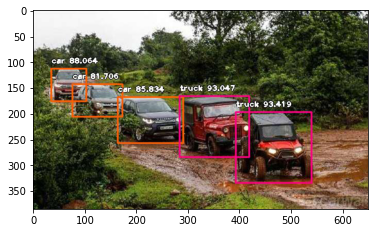

--------------
car  :  53.47994565963745
car  :  55.34330606460571
car  :  78.17084193229675
car  :  78.69302034378052
truck  :  53.15536856651306
car  :  79.54487800598145
car  :  51.864129304885864
car  :  80.19912838935852
car  :  78.27104926109314
car  :  53.96125316619873
car  :  79.07861471176147
car  :  93.14531087875366
car  :  93.10698509216309
person  :  62.57113218307495
motorcycle  :  72.43324518203735
car  :  90.96182584762573
car  :  98.62685203552246
car  :  99.62944984436035
car  :  98.35715293884277
car  :  99.3407130241394
car  :  96.76777124404907
car  :  99.51249361038208


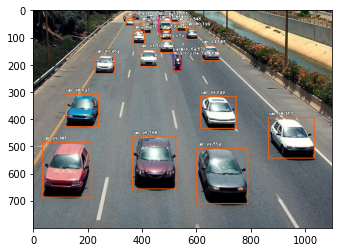

--------------
traffic light  :  61.24865412712097
traffic light  :  82.08239078521729
traffic light  :  81.5240740776062
traffic light  :  70.0011134147644
traffic light  :  80.72310090065002
traffic light  :  50.11991262435913
traffic light  :  89.2391562461853
person  :  51.351720094680786
car  :  89.22679424285889
car  :  85.76200604438782
car  :  98.49583506584167


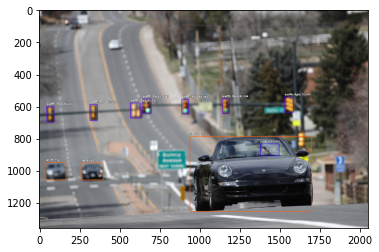

--------------
car  :  98.51655960083008
car  :  96.24590873718262


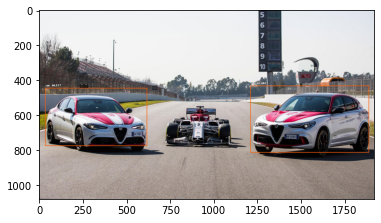

--------------
car  :  66.05319380760193
car  :  53.023314476013184
car  :  59.17741656303406
car  :  54.86108064651489
car  :  63.072556257247925
car  :  53.414446115493774
car  :  58.202338218688965
car  :  55.4387629032135
car  :  74.77720379829407
car  :  50.09770393371582
car  :  76.59299373626709
car  :  65.80232381820679
car  :  60.145264863967896
car  :  51.334112882614136
car  :  62.99652457237244
car  :  64.62877988815308
car  :  68.45568418502808
car  :  62.309932708740234
car  :  67.88821816444397
car  :  68.40684413909912
car  :  68.67576241493225
car  :  79.85391616821289
car  :  72.51300811767578
car  :  58.73750448226929
car  :  58.17973017692566
car  :  66.39672517776489
car  :  51.7814576625824
car  :  55.5176317691803
car  :  62.47504949569702
car  :  58.916670083999634
car  :  60.11530160903931
car  :  59.0262770652771
car  :  72.70689606666565
car  :  53.29967737197876
car  :  61.49073243141174
car  :  72.52642512321472
car  :  70.05898356437683
car  :  61.04903221

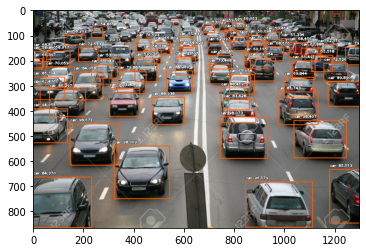

--------------
car  :  52.46449112892151
car  :  69.66873407363892
car  :  62.534838914871216
car  :  60.60934662818909
car  :  60.4203462600708
car  :  64.90505933761597
car  :  62.03608512878418
car  :  86.68854832649231
car  :  59.46707725524902
car  :  50.969481468200684
car  :  83.32006931304932
car  :  53.52495312690735
car  :  61.5064799785614
car  :  59.8034143447876
car  :  90.92748761177063
car  :  55.81583380699158
car  :  52.538543939590454
car  :  67.63454079627991
truck  :  62.70844340324402
car  :  73.90867471694946
car  :  78.3057451248169
car  :  95.70762515068054
car  :  53.030574321746826
car  :  59.15762186050415
car  :  66.3175642490387
truck  :  58.7485671043396
car  :  91.38344526290894
car  :  53.705894947052
car  :  55.012887716293335
car  :  60.04513502120972
car  :  58.24834704399109
car  :  62.54214644432068
car  :  62.74857521057129
car  :  60.95646619796753
car  :  76.45912170410156
car  :  63.02988529205322
car  :  55.51624298095703
car  :  50.62168240547

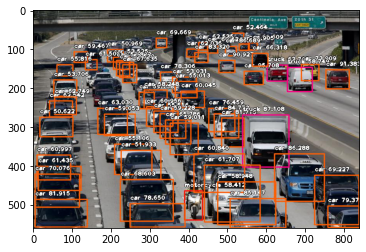

PEOPLE
--------------
person  :  60.5884313583374
person  :  69.18935775756836
person  :  50.91426968574524
person  :  56.36982321739197
person  :  71.06402516365051
person  :  60.98778247833252
person  :  55.13916015625
person  :  50.753986835479736
person  :  61.8403434753418
person  :  67.52853393554688
person  :  77.1023154258728
person  :  70.98898887634277
person  :  73.91961812973022
person  :  81.65055513381958
person  :  55.997878313064575
person  :  91.00801348686218
person  :  59.35891270637512
person  :  69.5555567741394
person  :  88.72963190078735
person  :  82.90302753448486
person  :  78.24609279632568


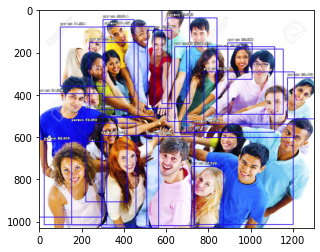

--------------
person  :  76.92222595214844
person  :  81.62097930908203
person  :  59.6386194229126
person  :  66.61009788513184


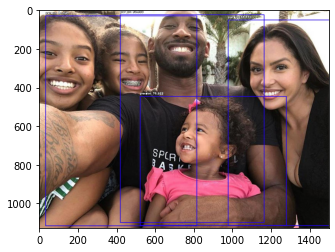

--------------
person  :  65.74121117591858
person  :  81.76232576370239
person  :  57.670122385025024
person  :  65.89208245277405
person  :  65.66505432128906
person  :  74.57231283187866
person  :  56.774622201919556
person  :  56.71650171279907
person  :  81.7084789276123
person  :  83.24034214019775
person  :  74.52961206436157
person  :  53.84659767150879
person  :  78.61303687095642


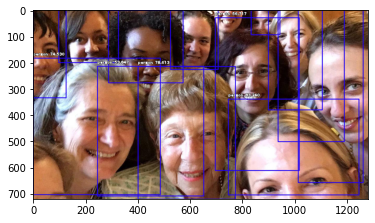

--------------
person  :  91.58653020858765
person  :  89.52427506446838
person  :  82.7108383178711
person  :  73.48674535751343


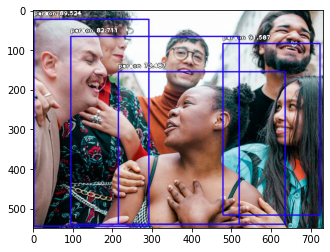

--------------
person  :  61.262047290802
umbrella  :  66.16592407226562
person  :  55.29302358627319
person  :  68.40150356292725
person  :  59.19310450553894
person  :  62.14346885681152
person  :  81.96265697479248
person  :  55.727291107177734
person  :  91.96129441261292
person  :  78.6192536354065
person  :  59.72738265991211
person  :  68.2905912399292
person  :  80.56620955467224
person  :  91.88061356544495
person  :  89.77718949317932
person  :  82.20446705818176


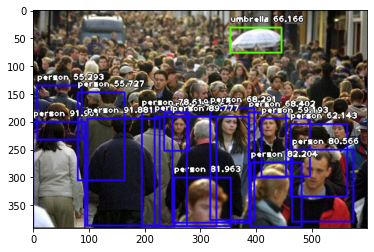

--------------


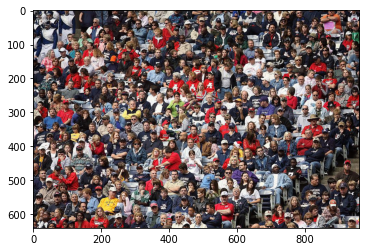

In [6]:
import os

paths_in = ['./data/distance/cars/', './data/distance/people']
paths_out = ['./output/cars/', './output/people/']
names = ['CARS', 'PEOPLE']

for name_in, name_out, name in zip(paths_in, paths_out, names):
    print(name)
    for entry in os.scandir(name_in):
        to_draw_input = entry.path
        to_draw_output = name_out+entry.name
        detect_and_draw('--------------', to_draw_input, to_draw_output)
    print('===============================================================')

### Выводы
* Машины модель распознает с различных ракурсов (сзади в том числе) достаточно хорошо даже вдали (15-20 метров), кроме гоночной машины, вероятность увеличивается с приближением, но в любом случае неплохая: начинается от 60+ процентов (на 15-20 метрах).
* Людей хуже (особенно когда толпы (т.е. видно только лица). Но для крупных фотографий, даже обрезанные лица идентифицируются pretty good (70+ процентов).

### Part 3. Video детектинг


Туториал [тут](https://towardsdatascience.com/train-image-recognition-ai-with-5-lines-of-code-8ed0bdd8d9ba).

Модель [тут](https://github.com/OlafenwaMoses/ImageAI/releases/download/1.0/yolo.h5).

### 3.1 Подгружаем модель

In [7]:
from imageai.Detection import VideoObjectDetection
import os

execution_path = os.getcwd()

detector = VideoObjectDetection()
detector.setModelTypeAsYOLOv3()
detector.setModelPath(execution_path +"/models/yolo.h5")
detector.loadModel()

In [8]:
video_path = detector.detectObjectsFromVideo(input_file_path=execution_path+"/data/traffic-mini.mp4",
                                output_file_path=execution_path + "/output/traffic_mini_detected_1"
                                , frames_per_second=29, log_progress=True)
print(f'Результат можно посмотреть по пути: ./output/traffic_mini_detected_1')

Processing Frame :  1
Processing Frame :  2
Processing Frame :  3
Processing Frame :  4
Processing Frame :  5
Processing Frame :  6
Processing Frame :  7
Processing Frame :  8
Processing Frame :  9
Processing Frame :  10
Processing Frame :  11
Processing Frame :  12
Processing Frame :  13
Processing Frame :  14
Processing Frame :  15
Processing Frame :  16
Processing Frame :  17
Processing Frame :  18
Processing Frame :  19
Processing Frame :  20
Processing Frame :  21
Processing Frame :  22
Processing Frame :  23
Processing Frame :  24
Processing Frame :  25
Processing Frame :  26
Processing Frame :  27
Processing Frame :  28
Processing Frame :  29
Processing Frame :  30
Processing Frame :  31
Processing Frame :  32
Processing Frame :  33
Processing Frame :  34
Processing Frame :  35
Processing Frame :  36
Processing Frame :  37
Processing Frame :  38
Processing Frame :  39
Processing Frame :  40
Processing Frame :  41
Processing Frame :  42
Processing Frame :  43
Processing Frame :  

### Выводы:
* насколько я понял, каждое видео разбивается на изображение и далее идентифицируются объекты. Поэтому все работает хорошо, но, возможно, хотелось бы быстрее.